# scRNAseq_keloid_sampleKF1_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532268,28.5,1199875,64.1,641780,34.3
Vcells,991366,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_directory/cellRanger_wd/KF/KF1/outs/filtered_feature_bc_matrix")

In [7]:
KF1.counts <- Read10X(data.dir = getwd())

In [8]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#397
dobultesIndex=dobultes[,1]>0
KF1.counts.noDoublet=KF1.counts[,!dobultesIndex]
dim(KF1.counts.noDoublet)

'data.frame':	9663 obs. of  1 variable:
 $ V1: num  0 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 397

[1] 33538  9266

In [9]:
KF1 <- CreateSeuratObject(counts = KF1.counts.noDoublet,project = "KF1", min.cells = 3, min.features = 200)

In [10]:
KF1

An object of class Seurat 
21257 features across 8715 samples within 1 assay 
Active assay: RNA (21257 features)

In [11]:
KF1[["percent.mt"]] <- PercentageFeatureSet(KF1, pattern = "^MT-")

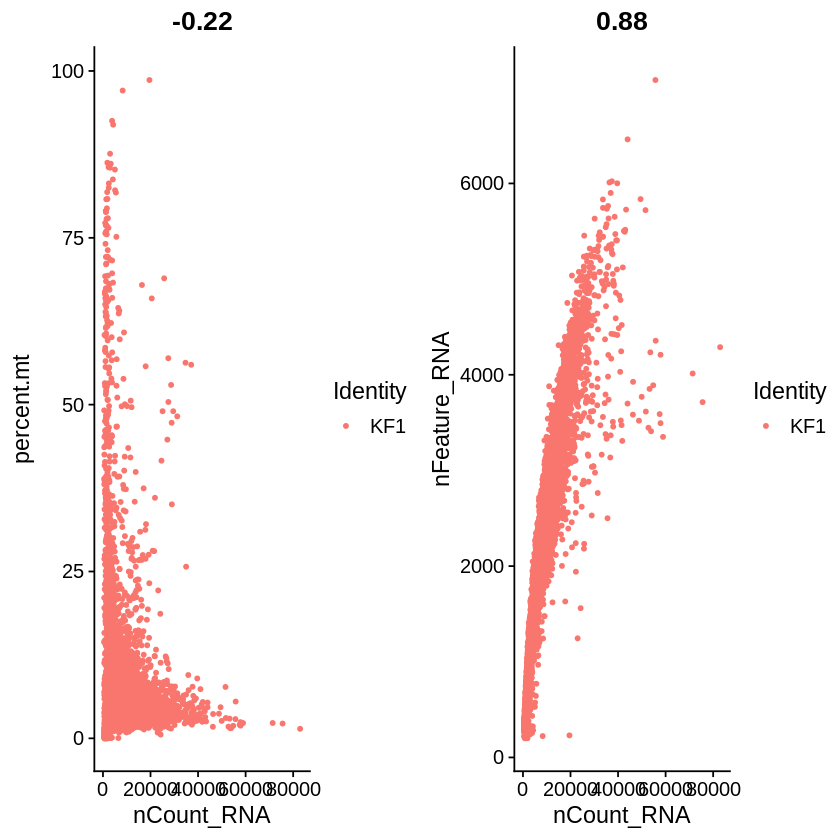

In [12]:
plot1 <- FeatureScatter(KF1, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(KF1, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [13]:
KF1 <- subset(KF1, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [14]:
KF1

An object of class Seurat 
21257 features across 7612 samples within 1 assay 
Active assay: RNA (21257 features)

In [15]:
KF1 <- NormalizeData(KF1, normalization.method = "LogNormalize", scale.factor = 10000)
KF1 <- FindVariableFeatures(KF1, selection.method = "vst", nfeatures = 2000)
KF1 <- ScaleData(KF1, verbose = FALSE)
KF1 <- RunPCA(KF1, npcs = 30, verbose = FALSE)
KF1 <- RunUMAP(KF1, reduction = "pca", dims = 1:15)
KF1 <- FindNeighbors(KF1, dims = 1:15)
KF1 <- FindClusters(KF1, resolution = 0.5)
KF1 <- RunTSNE(object = KF1, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”12:36:25 UMAP embedding parameters a = 0.9922 b = 1.112
12:36:25 Read 7612 rows and found 15 numeric columns
12:36:25 Using Annoy for neighbor search, n_neighbors = 30
12:36:25 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
12:36:26 Writing NN index file to temp file /tmp/RtmpF8lUKx/file1474c6b65e25e
12:36:26 Searching Annoy index using 1 thread, search_k = 3000
12:36:30 Annoy recall = 100%
12:36:30 Commencing smooth kNN distance calibration using 1 thread
12:36:31 Initializing from normalized Laplacian + noise
12:36:32 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7612
Number of edges: 251909

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 14
Elapsed time: 0 seconds



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

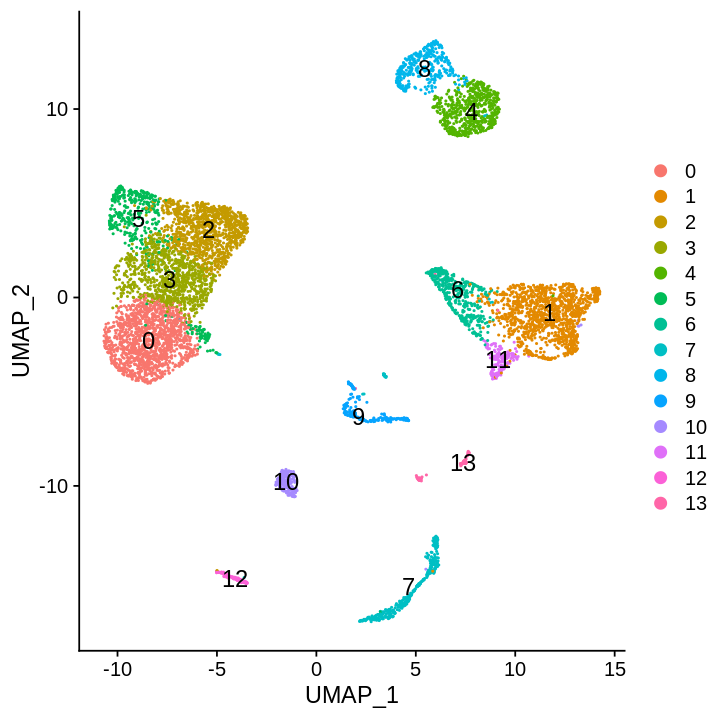

In [16]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(KF1, reduction = "umap",label = T,label.size = 5)

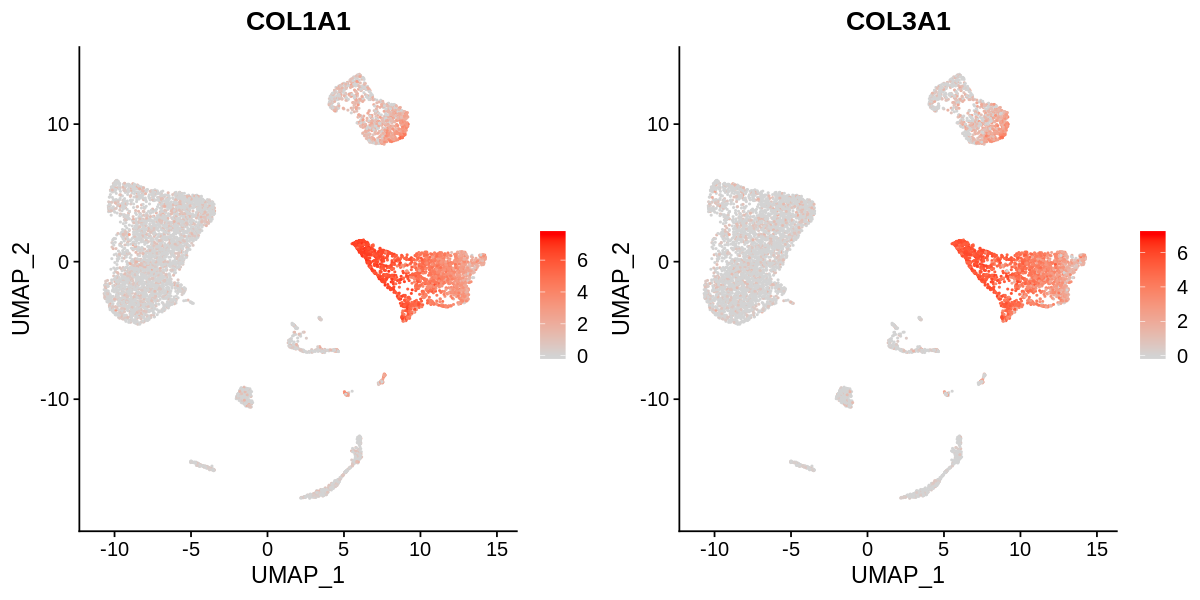

In [17]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF1, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

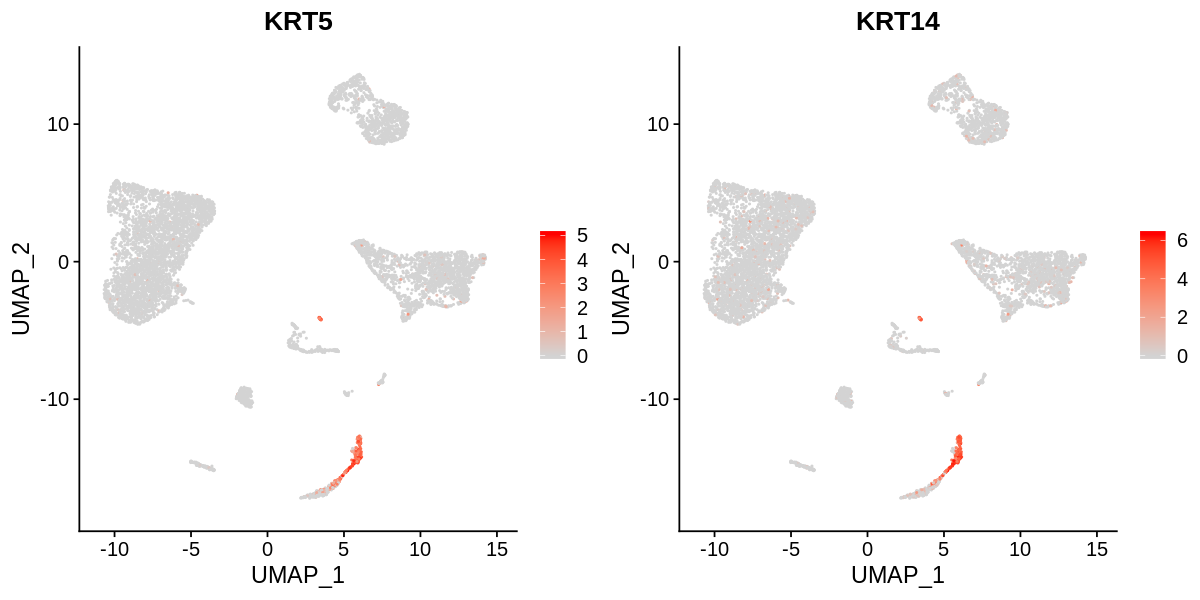

In [18]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF1, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

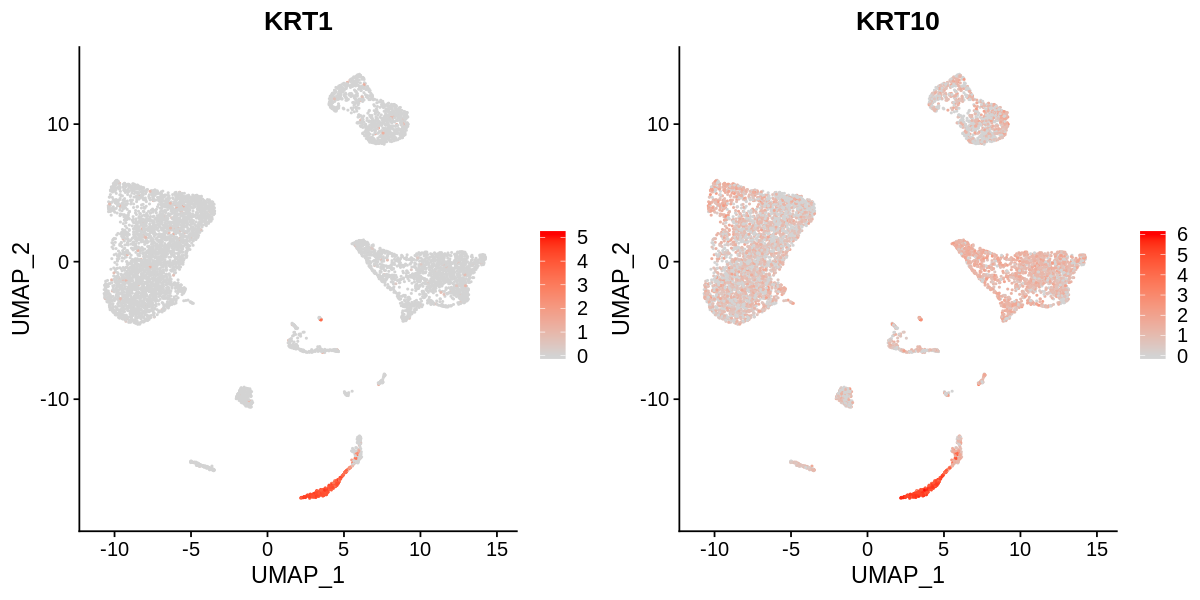

In [19]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF1, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

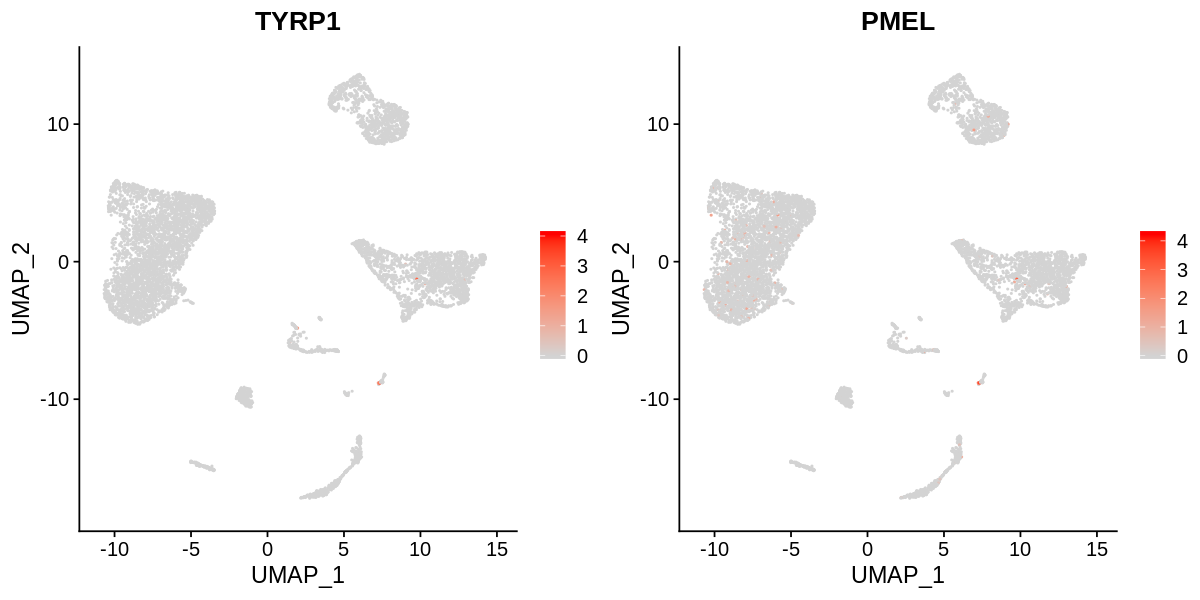

In [20]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF1, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

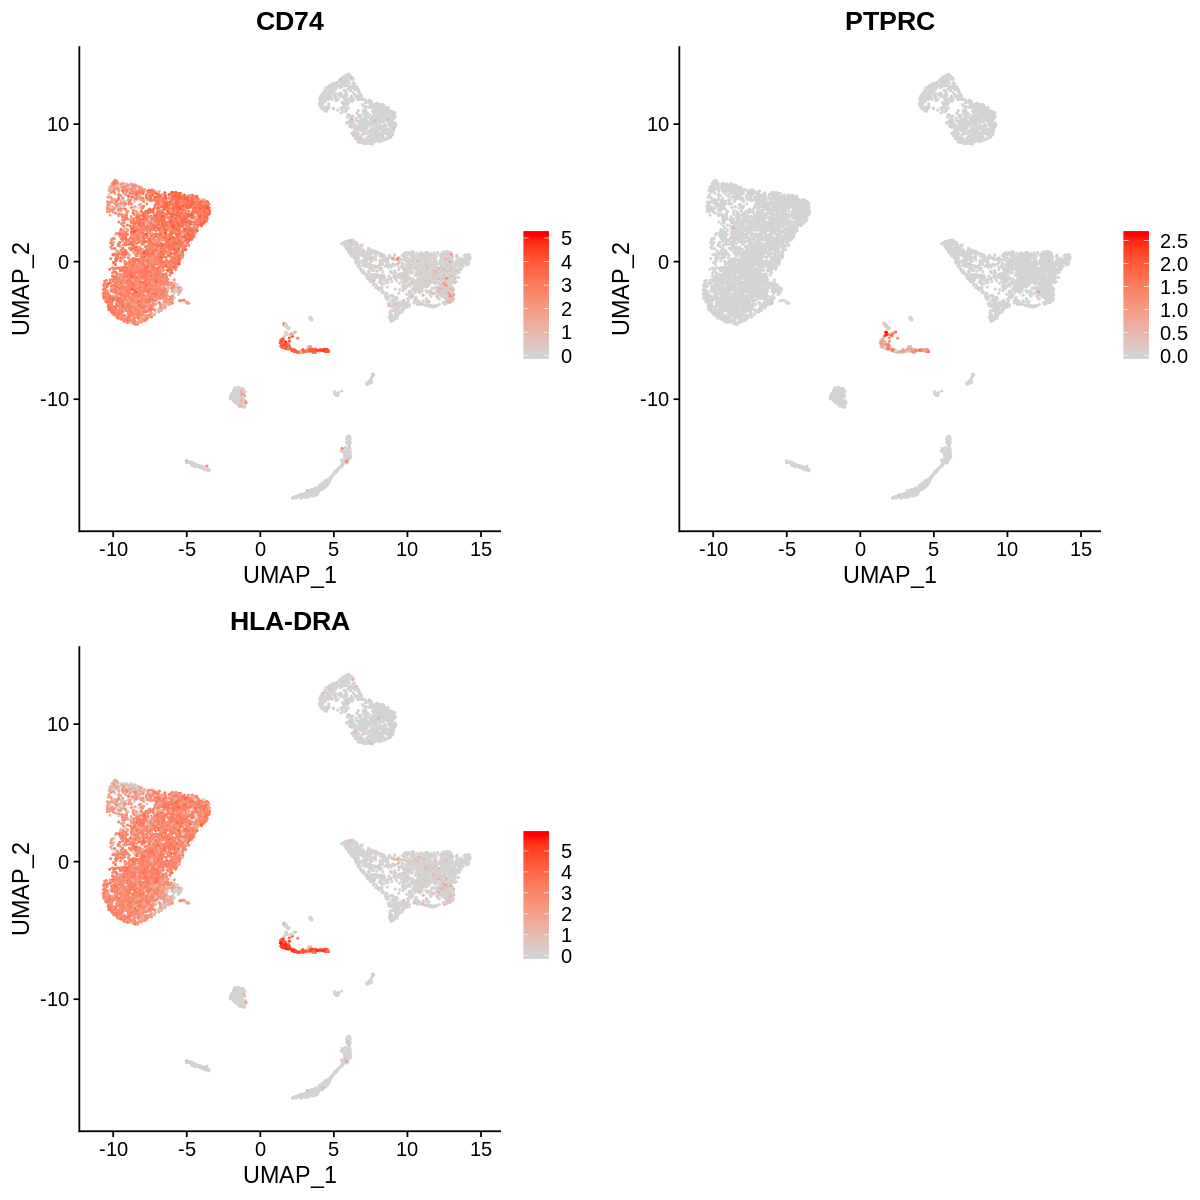

In [21]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

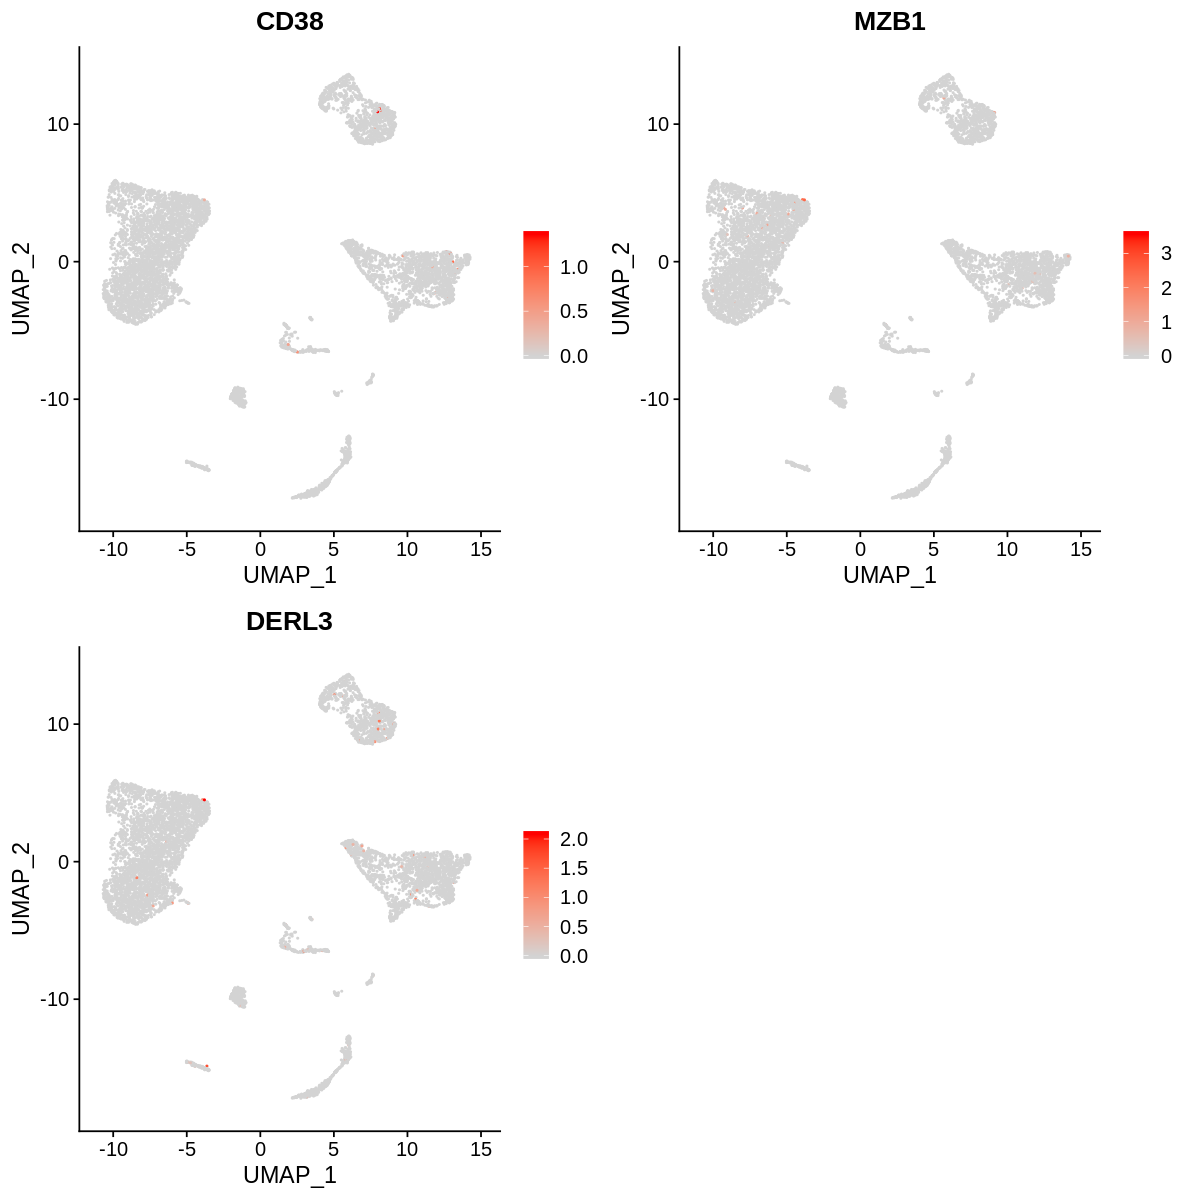

In [22]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

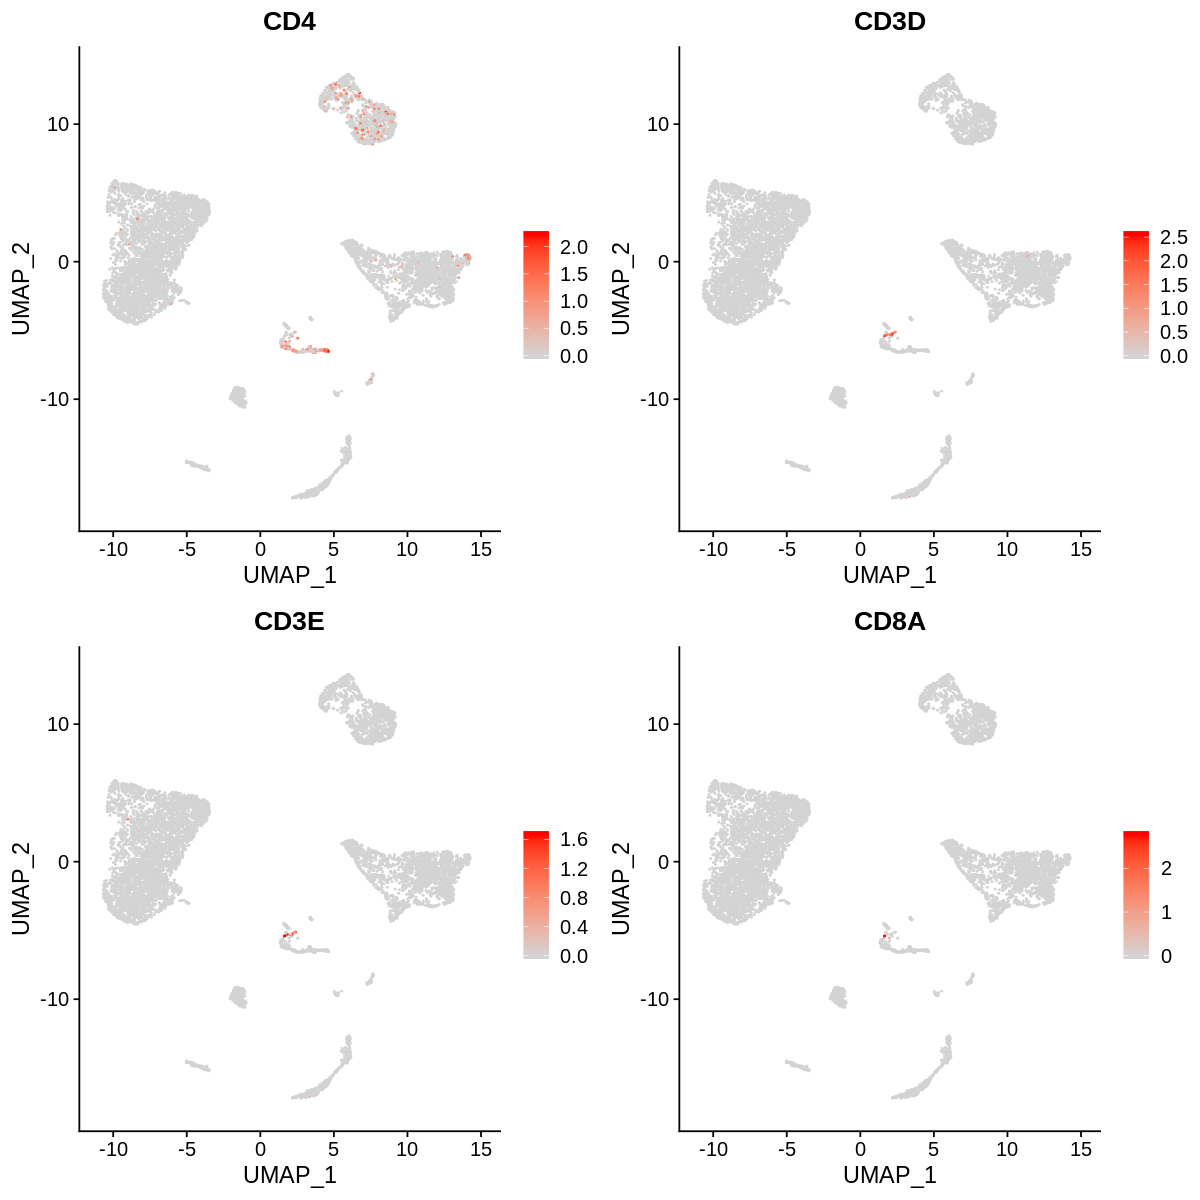

In [23]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

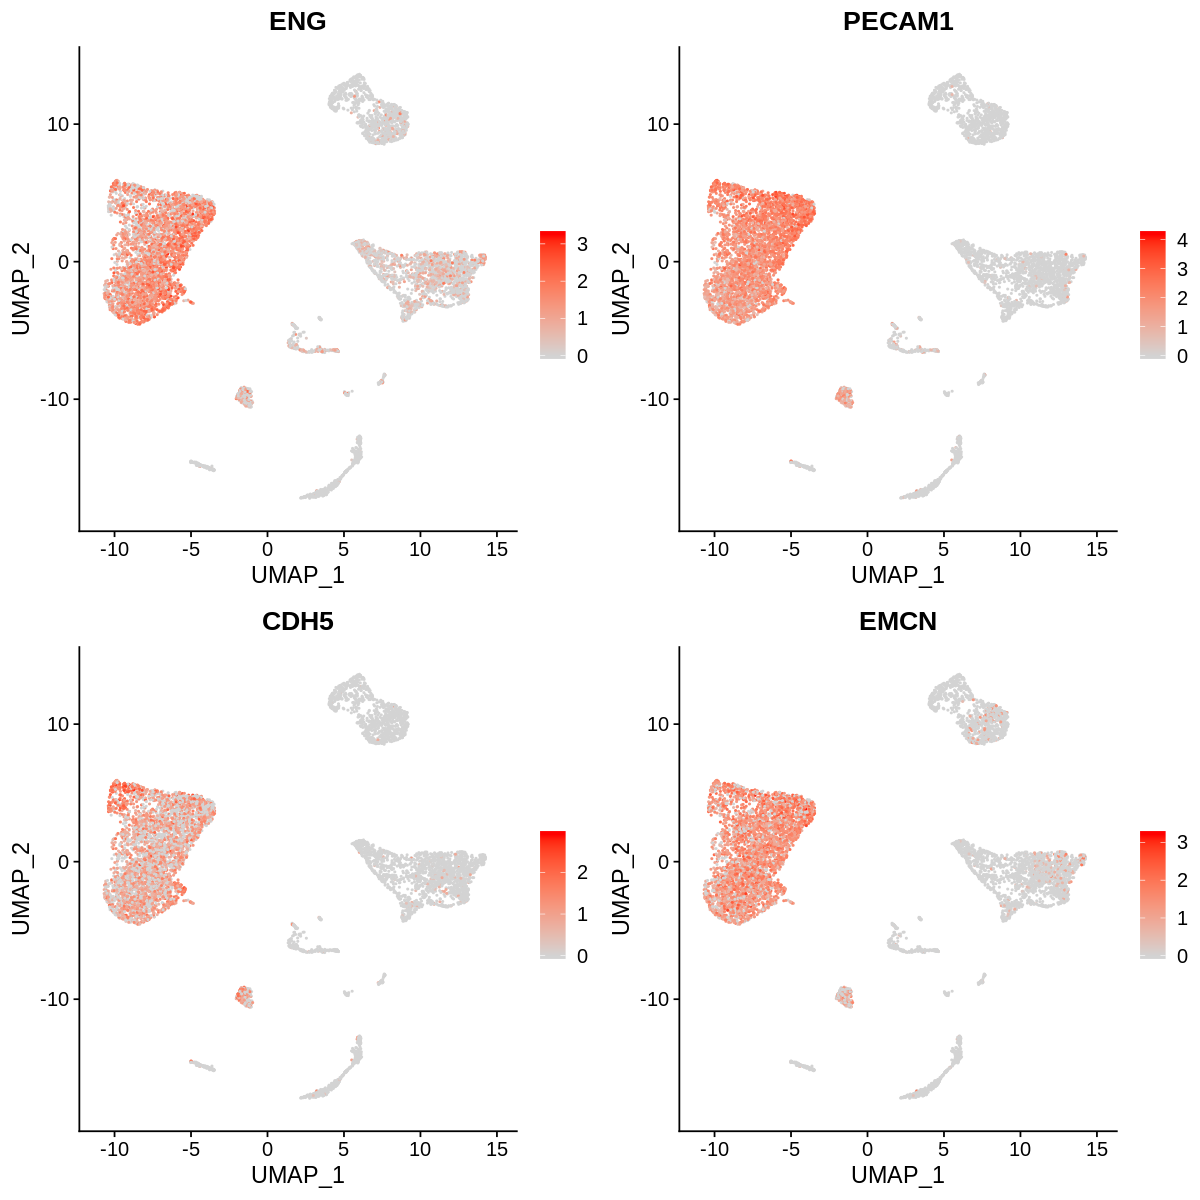

In [24]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

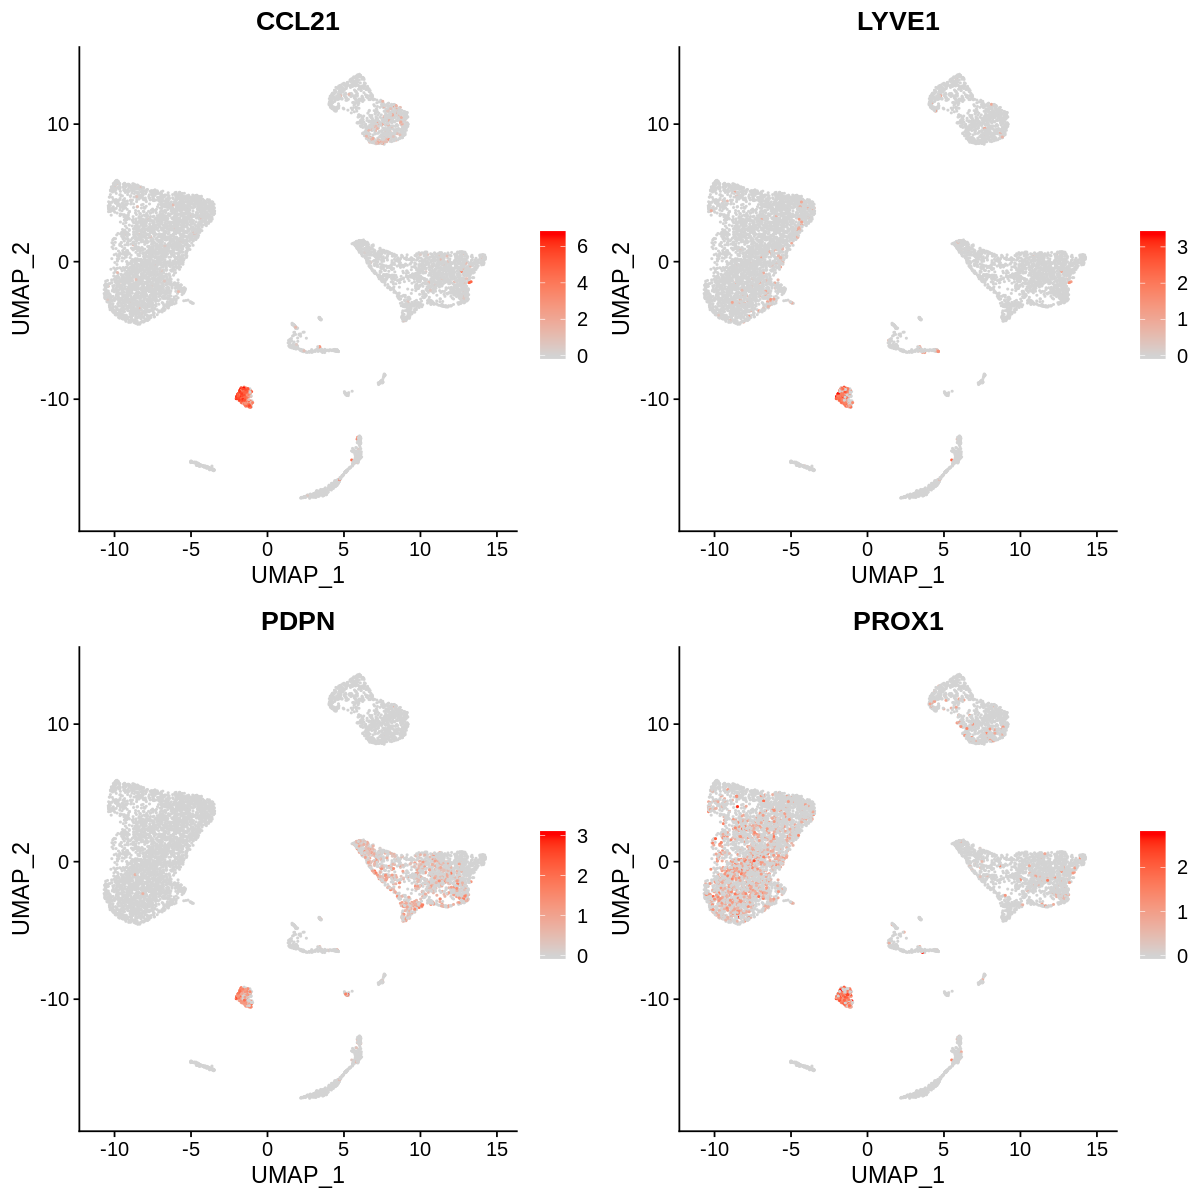

In [25]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

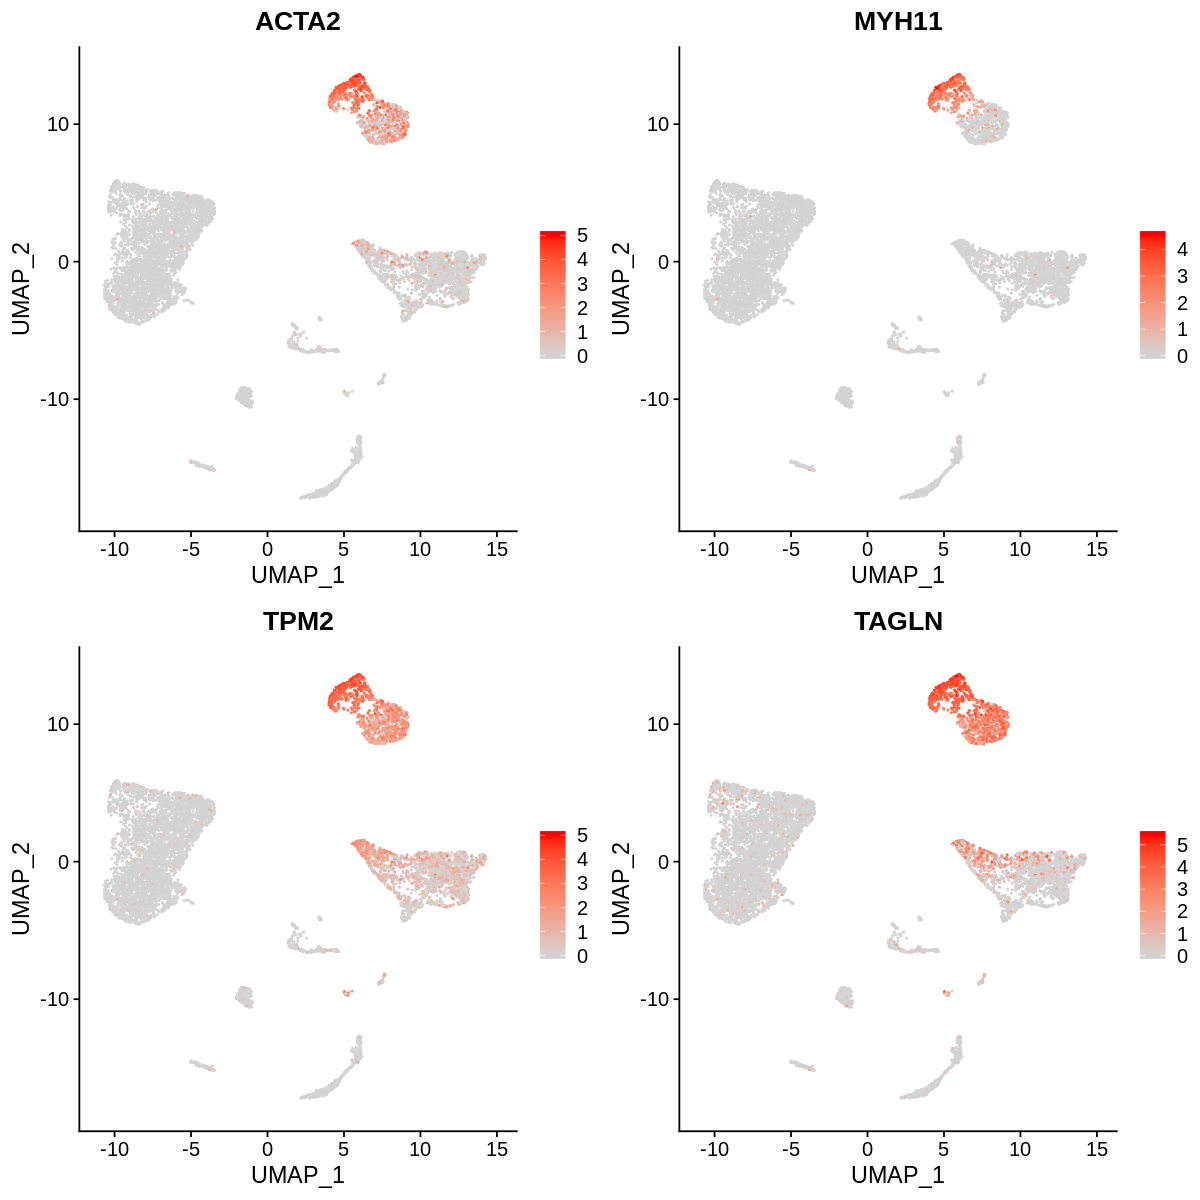

In [26]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF1, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

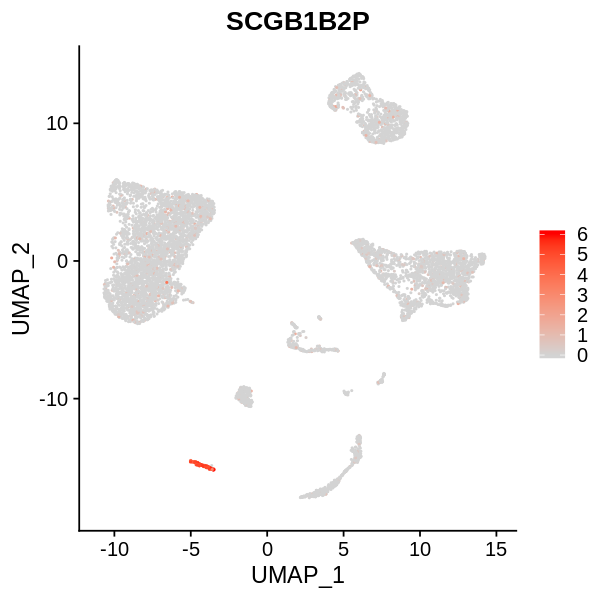

In [28]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(KF1, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

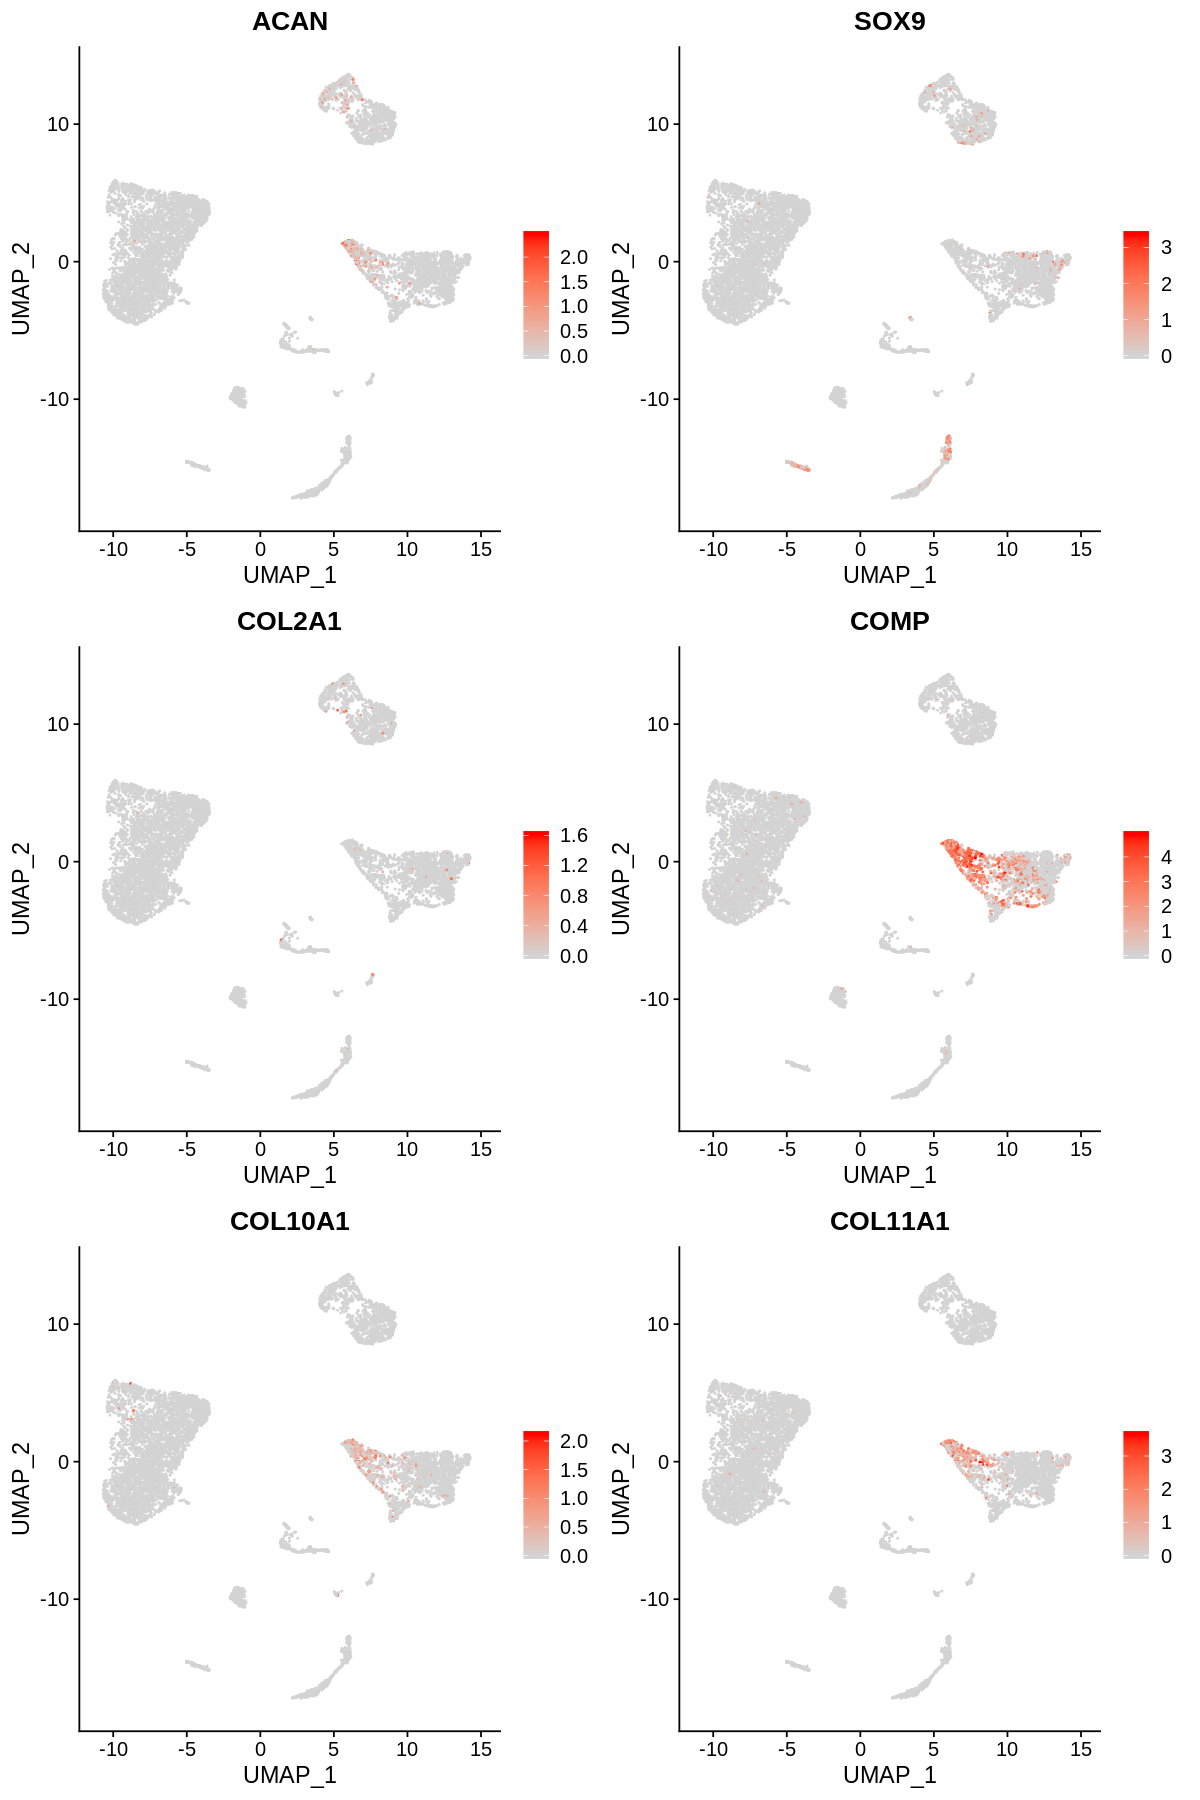

In [27]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(KF1, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [4]:
load("KF1.seurat.object.Rdata")

In [5]:
dim(KF1)
KF1$dataset=rep("KF1",ncol(KF1))

[1] 21257  7612

In [6]:
table(Idents(KF1))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
1371 1206 1060  904  626  447  440  413  347  225  199  165  110   99 

In [7]:
KF1.fib=subset(KF1,idents = c("1","6","11"))

In [8]:
KF1.fib

An object of class Seurat 
21257 features across 1811 samples within 1 assay 
Active assay: RNA (21257 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [9]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/KF1")

In [10]:
save(KF1,file="KF1.seurat.object.Rdata")

In [11]:
save(KF1.fib,file="KF1.fib.seurat.object.Rdata")

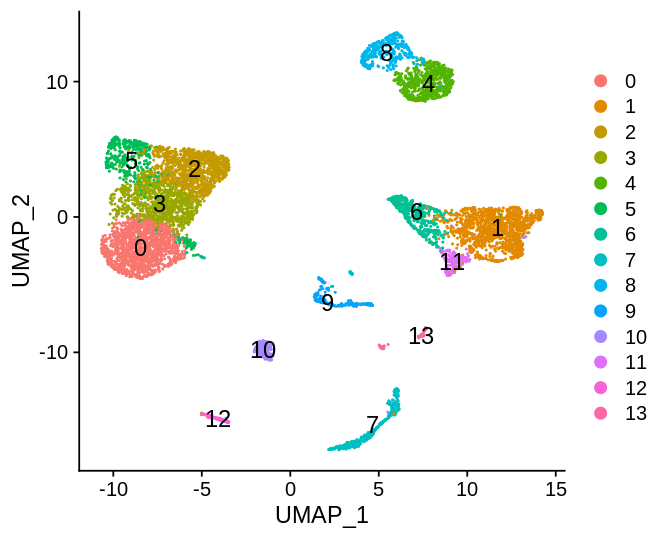

In [37]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(KF1, reduction = "umap",label = T,label.size = 5)

In [39]:
new.cluster.id=c("Endothelial","Fibroblast","Endothelial","Endothelial","muscle_fiber","Endothelial","Fibroblast","Keratinocyte","muscle_fiber","Immune_cell","Lymphatic_endothelial","Fibroblast","Glandular","Melanocytes")
names(new.cluster.id)=levels(KF1)
KF1=RenameIdents(KF1,new.cluster.id)

In [40]:
table(Idents(KF1))


          Endothelial            Fibroblast          muscle_fiber 
                 3782                  1811                   973 
         Keratinocyte           Immune_cell Lymphatic_endothelial 
                  413                   225                   199 
            Glandular           Melanocytes 
                  110                    99 

In [41]:
write.csv(table(Idents(KF1)),"KF1.cluster_cellType_Statis.csv")

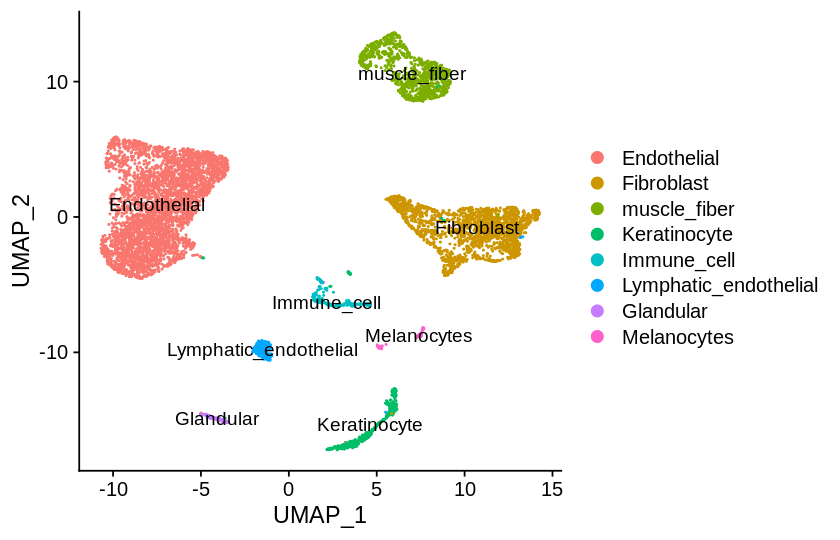

In [42]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(KF1, reduction = "umap",label = T,label.size = 4)